# DATASET: https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Jul 12 12:04:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

%cd /content/drive/MyDrive
# !mkdir Tensorflow_Practice  # I HAVE MADE IT.

Mounted at /content/drive
/content/drive/MyDrive


In [5]:
%cd Tensorflow_Practice

/content/drive/MyDrive/Tensorflow_Practice


In [38]:
# import tensorflow as tf
# import keras
import pandas as pd
import numpy as np
import sklearn # science kit tool module
from sklearn import linear_model 
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
from matplotlib import style
import pickle
print("import module done.")

import module done.


In [39]:
data = pd.read_csv("student/student-mat.csv", sep=";") # student/student-mat.csv
print(data.head()) # data.head() the top 5 dataset
# for col in data.columns:  # the way to visit the all columns in python


  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]


In [40]:
select = ["G1", "G2", "G3", "absences"] # here is the place where we do feature selector and if we want to try non-value feature, we should turn string into integer in the data.
predict = "G3"

data = data[select]
print(data.head())

   G1  G2  G3  absences
0   5   6   6         6
1   5   5   6         4
2   7   8  10        10
3  15  14  15         2
4   6  10  10         4


In [41]:
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])
# print(x) # each [] in the big [] means each row's information


# The Training Step

In [51]:
best = 0
for _ in range(30):
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

  linear = linear_model.LinearRegression()

  linear.fit(x_train, y_train)
  acc = linear.score(x_test, y_test)
  print(acc)

  if acc > best:
    with open("studentmodel.pickle", "wb") as f: # wb means write binary
      pickle.dump(linear, f)

pickle_in = open("studentmodel.pickle", "rb") # read binary
linear = pickle.load(pickle_in)


0.8236257392619287
0.8246772634326013
0.7820696529348559
0.6945809462236128
0.6822033699061918
0.8631883174066788
0.8067134518298805
0.9570982914549818
0.9131149703840289
0.7565030427812028
0.8182553735082185
0.8325566759856818
0.9010049123359704
0.8329614038166255
0.8378744658070659
0.8897375444874341
0.7064207700515555
0.929766865659413
0.8548496148483962
0.8641097940021127
0.9110336917540582
0.9187254664122309
0.6134862162953845
0.7482211911018439
0.8447347855151712
0.7317841116303436
0.7101651534192082
0.8071199365158416
0.7592167738369461
0.8676013445743181


fit(X, y[, sample_weight])  # Fit linear model. 

get_params([deep])  # Get parameters for this estimator.

predict(X) # Predict using the linear model.

score(X, y[, sample_weight]) # Return the coefficient of determination  of the prediction.

set_params(**params) # Set the parameters of this estimator.



In [52]:
linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.8676013445743181


In [53]:
print("Coefficient: '\n' ", linear.coef_) # Coeffiecient will be multiplied 
print("Intercept: '\n' ", linear.intercept_)

Coefficient: '
'  [0.18486159 0.98170773 0.03745624]
Intercept: '
'  -2.383728643931482


In [54]:
predictions = linear.predict(x_test) # print(predictions)
for x in range(len(predictions)):
  print(predictions[x], x_test[x], y_test[x])

8.450081762550491 [10  9  4] 11
4.158366885388733 [ 6  5 14] 5
14.282928349904756 [15 14  4] 14
12.781672483189613 [13 13  0] 12
14.882228178259405 [15 14 20] 13
3.896173210483574 [6 5 7] 6
11.799964757874388 [13 12  0] 12
8.415045127483523 [9 9 8] 10
7.35842492362397 [9 8 6] 10
12.064578036984745 [12 12 12] 13
6.116943127608785 [8 7 4] 6
5.969537774725319 [7 7 5] 7
15.634359259531239 [17 15  4] 16
19.513468813075853 [18 18 24] 18
16.246343800535207 [15 16  4] 15
10.48840969172527 [10 11  6] 11
14.929949525975688 [14 15  0] 15
11.804803966284783 [11 12 10] 13
10.325900021987291 [12 10 18] 10
8.692343119243198 [ 6 10  4] 10
14.745087933820061 [13 15  0] 15
8.230183535327892 [8 9 8] 10
8.952117189943158 [ 7 10  6] 10
4.233279363933064 [ 6  5 16] 5
9.281964530777053 [10 10  0] 9
12.316506603445788 [13 11 40] 11
5.439724524881281 [ 6  6 22] 4
9.431789487865716 [10 10  4] 10
6.159238575291345 [ 6  7 15] 8
15.07977448306435 [14 15  4] 15
6.901104548119063 [ 9  7 20] 8
6.266768084697446 [8 7 

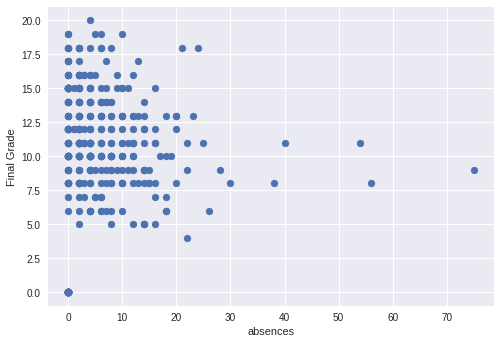

In [55]:

p = "absences"
style.use("seaborn")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()
